In [54]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import torch.cuda
from sklearn.metrics import f1_score, mean_squared_error, matthews_corrcoef
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Kullanılan cihaz: {device}')



Kullanılan cihaz: cuda


In [55]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modeli oluştur


Epoch [1/1000] Loss: 0.33366575837135315 Accuracy: 76.27284595300262 F1 Score: 0.8891053359377993 MSE: 0.16514360313315926 MCC: 0.8302063621869986
Epoch [2/1000] Loss: 0.462156742811203 Accuracy: 89.13185378590079 F1 Score: 0.9450041982329306 MSE: 0.07930809399477806 MCC: 0.9159514763711629
Epoch [3/1000] Loss: 0.022603144869208336 Accuracy: 95.52872062663185 F1 Score: 0.9753810511594848 MSE: 0.02643603133159269 MCC: 0.9617156233468463
Epoch [4/1000] Loss: 0.058195192366838455 Accuracy: 97.51958224543081 F1 Score: 0.9623279690357187 MSE: 0.0368798955613577 MCC: 0.9434376781533719
Epoch [5/1000] Loss: 0.20735566318035126 Accuracy: 98.27023498694517 F1 Score: 0.9970645070587812 MSE: 0.0039164490861618795 MCC: 0.9954001189693527
Early stopping! Training will be stopped.


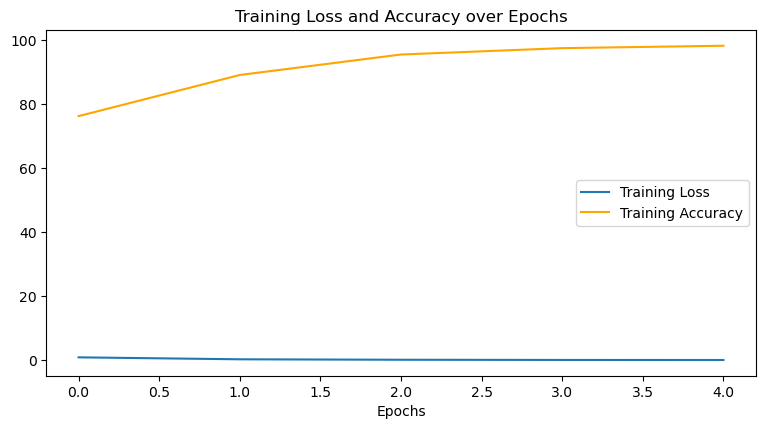

Epoch [1/1000] Loss: 0.5210749506950378 Accuracy: 55.505226480836235 F1 Score: 0.7840324480157279 MSE: 0.40662020905923346 MCC: 0.7142524672319094
Epoch [2/1000] Loss: 0.3456308841705322 Accuracy: 82.89198606271778 F1 Score: 0.9483745246523916 MSE: 0.08710801393728224 MCC: 0.9299979475046684
Epoch [3/1000] Loss: 0.1103442832827568 Accuracy: 94.52961672473867 F1 Score: 0.967285306754474 MSE: 0.05609756097560976 MCC: 0.956307362020448
Epoch [4/1000] Loss: 0.39099761843681335 Accuracy: 98.11846689895471 F1 Score: 0.9954677277043936 MSE: 0.005574912891986063 MCC: 0.9938232277399591
Epoch [5/1000] Loss: 0.0017358447657898068 Accuracy: 99.26829268292683 F1 Score: 0.9989547049873919 MSE: 0.0010452961672473868 MCC: 0.9985757549816275
Epoch [6/1000] Loss: 0.013780496083199978 Accuracy: 99.96515679442508 F1 Score: 1.0 MSE: 0.0 MCC: 1.0
Epoch [7/1000] Loss: 0.00012934341793879867 Accuracy: 100.0 F1 Score: 1.0 MSE: 0.0 MCC: 1.0
Epoch [8/1000] Loss: 0.0003352170460857451 Accuracy: 100.0 F1 Score: 1

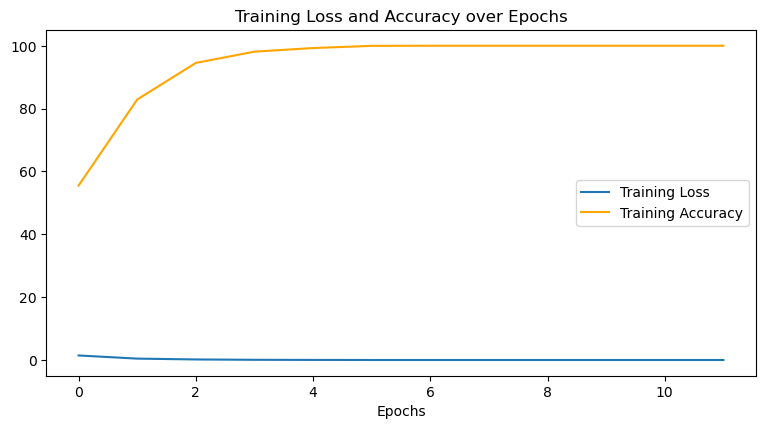

Epoch [1/1000] Loss: 0.2566978335380554 Accuracy: 79.15032679738562 F1 Score: 0.9119321106622289 MSE: 0.25620915032679736 MCC: 0.8503456317087594
Epoch [2/1000] Loss: 0.2397359311580658 Accuracy: 94.31372549019608 F1 Score: 0.9677115265274508 MSE: 0.04542483660130719 MCC: 0.95196375616854
Epoch [3/1000] Loss: 0.1192365512251854 Accuracy: 97.45098039215686 F1 Score: 0.9834825720910448 MSE: 0.016666666666666666 MCC: 0.9715815090061917
Epoch [4/1000] Loss: 0.03278538957238197 Accuracy: 98.16993464052288 F1 Score: 0.9855196207551937 MSE: 0.013398692810457516 MCC: 0.9741149668628419
Epoch [5/1000] Loss: 0.06630079448223114 Accuracy: 98.16993464052288 F1 Score: 0.9846795693568228 MSE: 0.012745098039215686 MCC: 0.9754474999265672
Epoch [6/1000] Loss: 0.0037755954544991255 Accuracy: 98.56209150326798 F1 Score: 0.986591723170747 MSE: 0.013071895424836602 MCC: 0.974777143340866
Epoch [7/1000] Loss: 0.001216812408529222 Accuracy: 98.56209150326798 F1 Score: 0.9888701086056823 MSE: 0.0104575163398

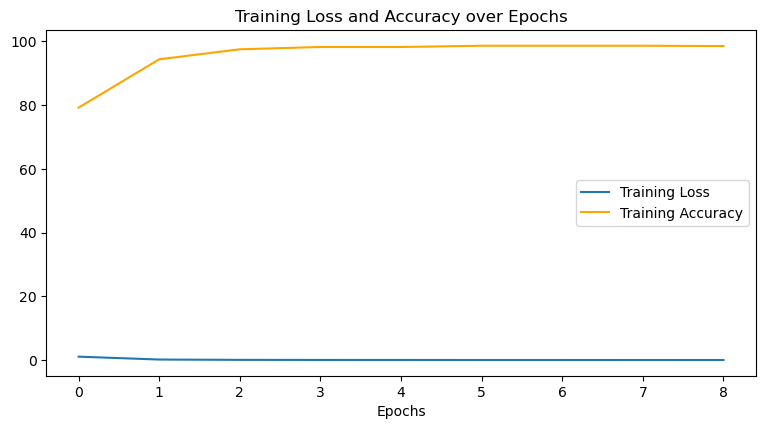

In [56]:
# Veri yolu - Klasördeki verilerin kategori alt klasörlerde bulunduğunu varsayalım.
data_dir1 = 'data1/'
data_dir2 = "data2/"
data_dir3 = "data3/"

# Veri dönüşümleri (örnek olarak)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Görselleri yeniden boyutlandiriyoruz
    transforms.ToTensor(),          # Görselleri tensöre dönüştür
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalizasyon 
])

# Veri yükleyici parametreleri
batch_size = 32
num_workers = 4

# Veriyi yükleyin
dataset1 = datasets.ImageFolder(data_dir1, transform=transform)
dataloader1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
dataset2 = datasets.ImageFolder(data_dir2, transform=transform)
dataloader2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
dataset3 = datasets.ImageFolder(data_dir3, transform=transform)
dataloader3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)

data1_model = CNNModel(len(dataset1.classes)).to(device)
data2_model = CNNModel(len(dataset2.classes)).to(device)
data3_model = CNNModel(len(dataset3.classes)).to(device)

models = [data1_model,data2_model,data3_model]
dataloaders = [dataloader1,dataloader2,dataloader3]

learning_rate = 0.001
num_epochs = 1000

for model, dataloader in zip(models,dataloaders):
    #print(f"Model: {model}, Dataloader: {dataloader}")
    train_losses = []
    train_accuracies = []

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    early_stopping_patience = 2
    best_loss = float('inf')
    epoch_loss = 0.0
    counter = 0
    correct = 0
    total = 0

    for epoch in range(num_epochs):
        epoch_loss = 0.0  # epoch_loss değerini her epoch başında sıfırla
        correct = 0
        total = 0

        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # İleri geçiş
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Geriye doğru yayılım ve parametre güncelleme
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            epoch_loss += loss.item()

        # Eğitim döngüsü sonunda metrikleri hesapla
        with torch.no_grad():
            model.eval()
            all_labels = []
            all_predictions = []

            for images, labels in dataloader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)

                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

            f1 = f1_score(all_labels, all_predictions, average='weighted')
            mse = mean_squared_error(all_labels, all_predictions)
            mcc = matthews_corrcoef(all_labels, all_predictions)

        model.train()  # Modeli tekrar eğitim moduna al

        accuracy = 100 * correct / total
        
        train_accuracies.append(accuracy)
        train_losses.append(epoch_loss / len(dataloader))

        print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()} Accuracy: {accuracy} F1 Score: {f1} MSE: {mse} MCC: {mcc}')

        # Early stopping kontrolü
        if loss.item() < best_loss:
            best_loss = loss.item()
            counter = 0
        else:
            counter += 1
            if counter >= early_stopping_patience:
                print("Early stopping! Training will be stopped.")
                break
    # Tüm metrikleri içeren tek bir grafik çiz
    plt.figure(figsize=(15, 8))

    # Loss ve Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(train_accuracies, label='Training Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.title('Training Loss and Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [38]:
# Modeli kaydet
torch.save(model.state_dict(), 'tumor.pth')

In [39]:
# Model yapısını oluştur
model = CNNModel(num_classes)  # Model yapısını aynı şekilde oluşturmalısınız

# Kaydedilmiş parametreleri yükle
model.load_state_dict(torch.load('tumor.pth'))

# Modeli tahminlerde kullanabilirsiniz
model.eval()  # Modeli tahmin modunda etkinleştirin
# Burada tahminlerinizi yapabilirsiniz


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200704, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [40]:
import cv2
from PIL import Image

In [41]:
image_path = 'data2/1/2302.png'  # Test görüntüsünün dosya yolu
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Görüntüyü BGR'den RGB'ye dönüştür
image_pil = Image.fromarray(image)

In [42]:
# Giriş görüntüsünü modele uygun hale getir
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image = transform(image_pil)
input_image = input_image.unsqueeze(0)  # Batch boyutunu ekleyin (1 görüntü için)

In [43]:
with torch.no_grad():
    output = model(input_image)

# Sınıflandırma sonuçlarını al
_, predicted = torch.max(output, 1)

# Sınıf tahminini bul
class_index = predicted.item()
class_label = dataset.classes[class_index]  # 'dataset' veri kümesinin sınıflarını içerdiğini varsayalım
if class_label == "1":
    class_label = "meningioma"
elif class_label == "2":
    class_label = "glioma"
elif class_label == "3":
    classlabel = "pituitary"
print(f'Tahmin edilen sınıf: {class_label}')

Tahmin edilen sınıf: meningioma
